In [143]:
#read graph as edge list
print('starting program')
import networkx as nx
import pandas as pd

#codonor graph - nodes are recipients. Edges are number of donors in common.
H1 = nx.read_edgelist('co_donor_relabeled_nodes.txt',nodetype=str,delimiter='\t!\t')#data=(('number_of_codonors',int)))

print(nx.number_of_nodes(H1) )#should be 212
print( nx.number_of_edges(H1) )#should be 22366
print(nx.density(H1) )

print(H1.nodes())




starting program
212
22366
1.0
['ROBERT ANDREWS', 'BERNARD SANDERS', 'GEORGE ALLEN', 'SPENCER BACHUS', 'EDWARD ROYCE', 'PETER HOEKSTRA', 'ROBERT MENENDEZ', 'MIKE COFFMAN', 'TOM LATHAM', 'LLOYD DOGGETT', 'JESSE JACKSON', 'DIANA DEGETTE', 'JAMES MCGOVERN', 'JOHN TIERNEY', 'DEBBIE STABENOW', 'JO EMERSON', 'WILLIAM PASCRELL', 'CAROLYN MCCARTHY', 'MIKE MCINTYRE', 'RONALD KIND', 'LOIS CAPPS', 'BARBARA LEE', 'HEATHER WILSON', 'JUDY BIGGERT', 'SHELLEY BERKLEY', 'RUSH HOLT', 'PAUL RYAN', 'TAMMY BALDWIN', 'MARIA CANTWELL', 'DIANNE FEINSTEIN', 'DANIEL LUNGREN', 'BILL NELSON', 'DAVID GILL', 'STENY HOYER', 'THOMAS CARPER', 'MARCY KAPTUR', 'BENJAMIN CARDIN', 'PETER DEFAZIO', 'LOUISE SLAUGHTER', 'FREDERICK UPTON', 'NANCY PELOSI', 'NITA LOWEY', 'ILEANA ROS-LEHTINEN', 'JEFFRY FLAKE', 'MICHAEL HONDA', 'TODD AKIN', 'DENNIS REHBERG', 'STEVE ISRAEL', 'PATRICK TIBERI', 'ERIC CANTOR', 'SHELLEY CAPITO', 'RAUL GRIJALVA', 'STEVEN KING', 'BEN CHANDLER', 'SCOTT GARRETT', 'TIMOTHY BISHOP', 'TIM MURPHY', 'THOMAS HE

In [144]:
#get a list of the number of codonors
num_codonors_list = []
for e in H1.edges(data=True):
    #e is a tuple
    temp = (e[2])['number_of_codonors']
    num_codonors_list.append(temp)
#print(num_codonors_list)

#get a list of the edges and sort by num codonors
list_of_edges = []
for e in H1.edges(data=True):
    list_of_edges.append(e)
list_of_edges = sorted(H1.edges(data=True), key=lambda tup: tup[2]['number_of_codonors'])#sort by number of codonors
#print(list_of_edges)


[  2.19680000e+04   2.52000000e+02   6.00000000e+01   3.00000000e+01
   2.80000000e+01   1.20000000e+01   7.00000000e+00   2.00000000e+00
   1.00000000e+00   1.00000000e+00   2.00000000e+00   1.00000000e+00
   0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]


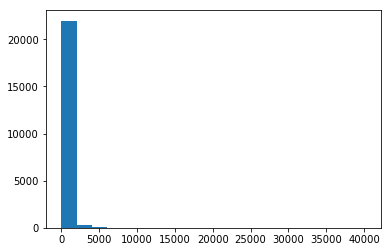

[ 1353.  2506.  3301.  3507.  2900.  2314.  1882.  1318.   826.]


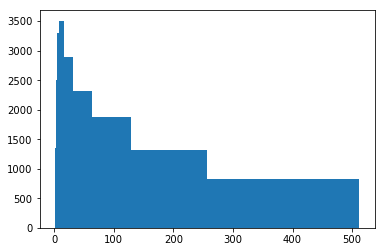

[ 1353.  2506.  3301.  3507.  2900.  2314.  1882.  1318.   826.]


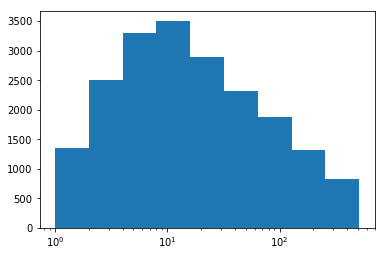

('TAMMY BALDWIN', 'ELIZABETH WARREN', {'number_of_codonors': 40203})


In [145]:
#want to plot distribution of num_codonors, each element of which is a value in the affinity matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

h = sorted(num_codonors_list)
#Bunch of 0's for initial ones. The last sorted values are:
#..., 12946, 13815, 14003, 14022, 14520, 15825, 17183, 18845, 21054, 21388, 22655, 29957, 40203]

#https://stackoverflow.com/questions/34291260/how-can-i-plot-multiple-figure-in-the-same-line-with-matplotlib
#https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell
#https://matplotlib.org/gallery/subplots_axes_and_figures/multiple_figs_demo.html

data = sorted(num_codonors_list)
counts, bins, bars = plt.hist(data, bins=20)
print(counts)
plt.show()



#plt.figure(1)
#plt.subplot(211)
bins = 2**(np.arange(0,10))
#plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

#plt.subplot(212)
bins = 2**(np.arange(0,10))
plt.xscale('log')
counts, bins, bars = plt.hist(data,bins=bins)
print(counts)
plt.show()

print(list_of_edges[-1])

In [146]:
num_edges = len(list_of_edges)
print("num_edges:")
print(num_edges)
print(float(.05*num_edges))
high_bkt = []#all edges above the 5% mark
high_cutoff = num_edges - float(.05*num_edges)
mid_bkt = []
mid_cutoff = num_edges - float(.3*num_edges)
low_bkt = []

for e in range(num_edges):
    if e >= high_cutoff:
        high_bkt.append(list_of_edges[e])
    elif e >= mid_cutoff:
        mid_bkt.append(list_of_edges[e])
    else:
        low_bkt.append(list_of_edges[e])
        
#print(high_bkt)
print("high_bkt len:")
print(len(high_bkt))
print("mid_bkt len:")
print(len(mid_bkt))
print("low_bkt len:")
print(len(low_bkt))

num_edges:
22366
1118.3
high_bkt len:
1118
mid_bkt len:
5591
low_bkt len:
15657


I'm just going to do the entire high bucket as opposed to sampling from the lower ones because in the past the lower ones have led to poor results - at least in Google CSE, the values were often 0, which is undesirable. Doing the entire bucket as opposed to randomly sampling also allows me to not to overlap the edges I query on Google. I can always randomly sample from the bucket afterwards.

In [147]:

#host google.com 8.8.8.8

import requests
from bs4 import BeautifulSoup
#had to write a scraping method to work for me until I figure out why I can't find the server...
def jaccard_google_search_scrape(search_term1, search_term2, api_key, cse_id, **kwargs):

    r = requests.get("https://www.google.com/search", params={'q':search_term1})

    soup = BeautifulSoup(r.text, "lxml")
    res = soup.find("div", {"id": "resultStats"})
    num1 = -2
    if (res.text.replace(",", "").split()[0].strip() == "About"):
        num1 = int(res.text.replace(",", "").split()[1].strip() )
    else:
        num1 = int(res.text.replace(",", "").split()[0].strip() )

    r = requests.get("https://www.google.com/search", params={'q':search_term2})

    soup = BeautifulSoup(r.text, "lxml")
    res = soup.find("div", {"id": "resultStats"})
    num2 = -2
    if (res.text.replace(",", "").split()[0].strip() == "About"):
        num2 = int(res.text.replace(",", "").split()[1].strip() )
    else:
        num2 = int(res.text.replace(",", "").split()[0].strip() )
    
    strBoth = search_term1 + ' ' + search_term2#I think this should be fine. There's so much noise anyways,
    #and sometimes it increases the number of results, sometimes decreases, so using AND isn't better.
    
    r = requests.get("https://www.google.com/search", params={'q':strBoth})

    soup = BeautifulSoup(r.text, "lxml")
    res = soup.find("div", {"id": "resultStats"})
    numCommon = -2
    if (res.text.replace(",", "").split()[0].strip() == "About"):
        numCommon = int(res.text.replace(",", "").split()[1].strip() )
    else:
        numCommon = int(res.text.replace(",", "").split()[0].strip() )
    
    num1 = int(num1)
    num2 = int(num2)
    numCommon = int(numCommon)
    #print('num results for str1:' + str(num1) )
    #print('num results for str2:' + str(num2) )
    #print('num results in common:' + str(numCommon) )
    
    
    #sometimes denominator was 0. try except ZeroDivionError.
    try:
        jacInd = numCommon /(num1+num2-numCommon) #can still use / for regular division, but want decimals here.
    except ZeroDivisionError:
        jacInd = -1
    
    try:
        divMin = numCommon / min(num1, num2)
    except ZeroDivisionError:
        divMin = -1
    try:
        divProd = numCommon / (num1*num2)
    except:
        divProd = -1
    #retList is of format: num results for str1, num results for str2, num results in common, the Jaccard index,
    #the intersection / the min, and the intersection / the product
    retList = [num1, num2, numCommon, jacInd, divMin, divProd]
    return retList

print("method processed")

method processed


In [148]:
#Figure out which edges to sample
instanceNum = 0#same thing as like a machineNum
start = instanceNum*33
end = start + 33#we can technically do 33 edges safely
#Note that if instanceNum were 1, we'd have [33:66].
all_edges_to_sample = high_bkt[start:end]#partition based on machine number
print(all_edges_to_sample[0])

('VALDEZ DEMINGS', 'JAMES GRAVES', {'number_of_codonors': 688})


In [149]:
#space out requests more - want to write a cron script eventually for maybe ~6-8 requests per hour as opposed
#to 100 per day which means 33 edges per day
import time
#time.sleep(1)


#choose the first of the following two lines if it's the very start / origination of the file. Otherwise go with second
#don't forget to save csv at the end
dfRes = pd.DataFrame(columns = ["str1", "str2", "num_codonors", "num1", "num2", "numCommon", "jacInd", "divMin", "divProd"])
#dfRes = pd.read_csv('./co_donor_google_queries_fin_6.csv')

counter = 0
#'''
#try:
for edge in all_edges_to_sample:
    #time.sleep(1)
    print(counter)
    counter = counter + 1
    name1 = '"' + edge[0] + '"'
    name2 = '"' + edge[1] + '"'

    my_api_key, my_cse_id = "0", "0"
    res = jaccard_google_search_scrape(name1, name2, my_api_key, my_cse_id, num=1)
    #   retList = [num1, num2, numCommon, jacInd, divMin, divProd]
    dfRow = pd.DataFrame([[edge[0], edge[1], (edge[2])['number_of_codonors'], res[0], res[1], res[2], res[3], res[4], res[5]]], 
                       columns = ["str1", "str2", "num_codonors", "num1", "num2", "numCommon", "jacInd", "divMin", "divProd"])

    dfRes = dfRes.append(dfRow, ignore_index=True)
#'''
#except:
savestr = './data/codonor_network_queries_instance_' + str(instanceNum) + '_5.20_highbkt_edges_' +
    str(start) + '_to_' + str(end-1) + '.csv'

dfRes.to_csv(savestr)
print('done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
done
